# Библиотеки
Подключим необходимые библиотеки для работы с данными и их дальнейшего анализа.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [2]:
import config
from scaler_serializator import ScalerSerializator

# Educational Data Analysis
Посмотрим на данные и покопаемся в них.

Для начала откроем `train_df.csv`

In [3]:
train_df = pd.read_csv("data/train_df.csv")
test_df = pd.read_csv("data/test_df.csv")
train_df

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
0,758,9,0,0,1,20,3,40,0,3,...,0.204682,0.271755,0.055623,0,0,0,0.38648,0.0,0.0,0
1,758,9,0,0,1,20,3,40,0,3,...,0.195531,0.188787,0.036914,0,0,0,0.10982,0.0,0.0,0
2,758,9,0,0,1,20,3,40,0,3,...,0.148609,0.186517,0.027718,0,0,0,0.03674,0.0,0.0,0
3,758,9,0,0,1,20,3,40,0,3,...,0.223748,0.229039,0.051247,0,0,0,0.00000,0.0,0.0,0
4,758,9,0,0,1,20,3,40,0,3,...,0.170935,0.249031,0.042568,0,0,0,0.00000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,494693,9,0,0,0,9,4,38,6,6,...,0.309672,0.921060,0.285226,0,0,0,0.98807,0.0,0.0,0
15077,494693,9,0,0,0,9,4,38,6,6,...,0.303805,0.995086,0.302312,0,0,0,0.87146,0.0,0.0,0
15078,494693,9,0,0,0,9,4,38,6,6,...,0.346538,0.993070,0.344137,0,0,0,0.49999,0.0,0.0,0
15079,494693,9,0,0,0,9,4,38,6,6,...,0.243154,0.994833,0.241898,0,0,0,0.67614,0.0,0.0,0


Посмотрим на типа данных:

In [4]:
train_df.dtypes.value_counts()

float64    60
int64      21
Name: count, dtype: int64

Можно сделать вывод, что все данные, с которыми предстоит работать - количественные, то есть нам не придется обрабатывать категориальные признаки.

Запишем все названия признаков. Известно, что все они имеют префикс `feature_` и некоторый порядковый номер от 0 до 78, поэтому просто сгенерируем названия.

In [5]:
features = [f"feature_{num}" for num in range(0, 79)]

## Дубликаты
Посмотрим есть ли в данных дубликаты. От них стоит избавиться, если они есть.

In [6]:
train_df[train_df.duplicated()]

,search_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,target
395,58362,9,0,4,0,9,4,26,3,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1590,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
1595,178474,9,3,3,0,9,4,46,7,6,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3047,303632,9,0,0,0,9,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3775,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3778,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
3780,379030,9,0,0,0,9,4,25,0,5,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
4690,471930,9,0,0,1,20,4,40,0,2,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
10985,97300,9,0,0,0,9,4,38,0,3,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0
10999,97922,9,0,0,1,20,4,0,0,0,...,0.0,0.0,0.0,0,0,0,0.0,0.0,0.0,0


Данные нашлись, следовательно убираем их.

In [7]:
train_df = train_df.drop_duplicates()

## Разделим данные
Разделим наши данные на признаки и таргет. `search_id` не идет никуда, так как, кажется, что это просто некоторый уникальный идентификатор запроса, в зависимости от которого рождаются признаки, но мы не можем использовать его как признак.

PS. Это делаем только сейчас, так как на предыдущем шаге убирали дубликаты в данных.

In [8]:
X_train, y_train = train_df[features], train_df["target"]
X_test, y_test = test_df[features], test_df["target"]

## Пустые значения
Посмотрим есть ли пустые значения в данных. Для этого воспользуемся библиотекой `missingno`.

In [9]:
import missingno as msno

<Axes: >

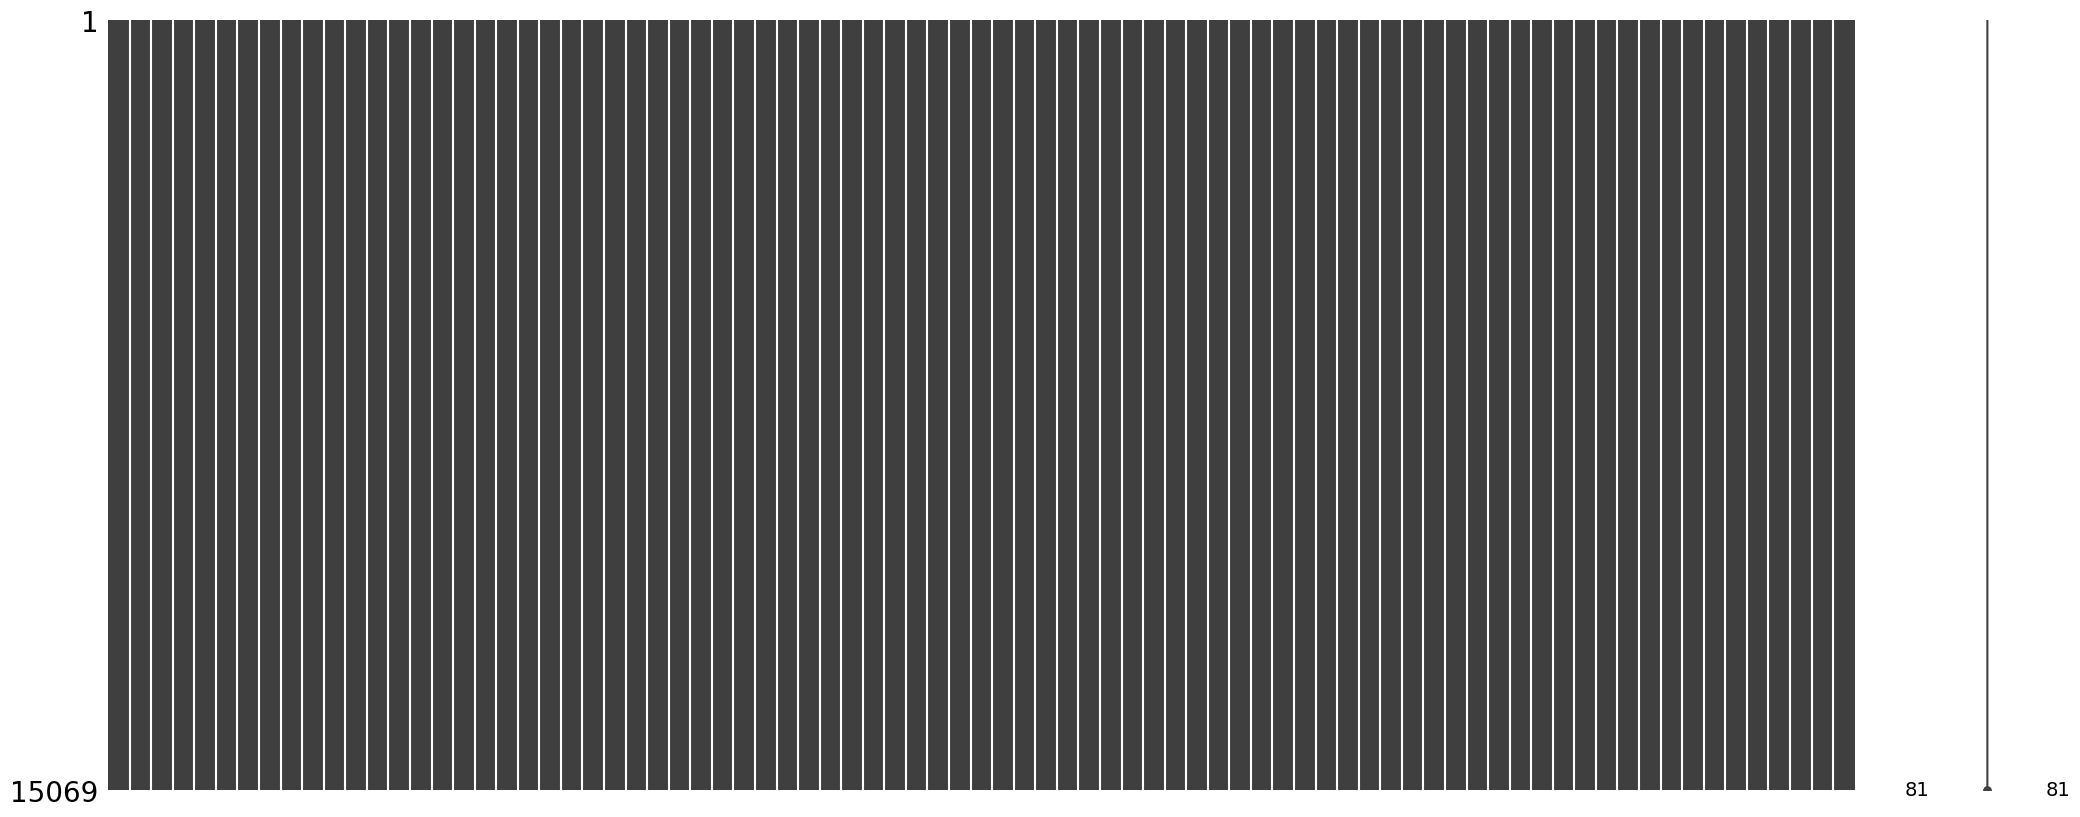

In [10]:
msno.matrix(train_df)

Как видно, пропусков нет! PS. Дополнительно можем проверить:

In [11]:
train_df.isna().sum().sum()

0

## Признаки с низкой дисперсией
Отбросим те признаки, у которых маленькая дисперсия, так как смысла квази константных признаков для обучения нет. Конечно же, перед этим надо нормализовать данные, чтобы можно было выбрать универсальный порого для минимальной дисперсии в данных.

In [12]:
def check_const_features(df: pd.DataFrame, feature_name: str, threshold: float = 0.1) -> bool:
    """Check if column variance is less or equal to a threshold"""
    return df[feature_name].var() <= threshold

In [13]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

Пройдемся по всем признакам и посмотрим какие из них квази константные.

In [14]:
const_features = []

for feature in features:
    if check_const_features(X_train_scaled, feature):
        const_features.append(feature)

len(const_features)

61

Получился 61 такой признак! Откинем их:

In [15]:
features = list(set(features) - set(const_features))

## Корреляция признаков
Посмотрим на то, какие признаки имеют высокую корреляцию. Их тоже имеет смысл откинуть.

Text(0.5, 1.0, 'Features Correlation')

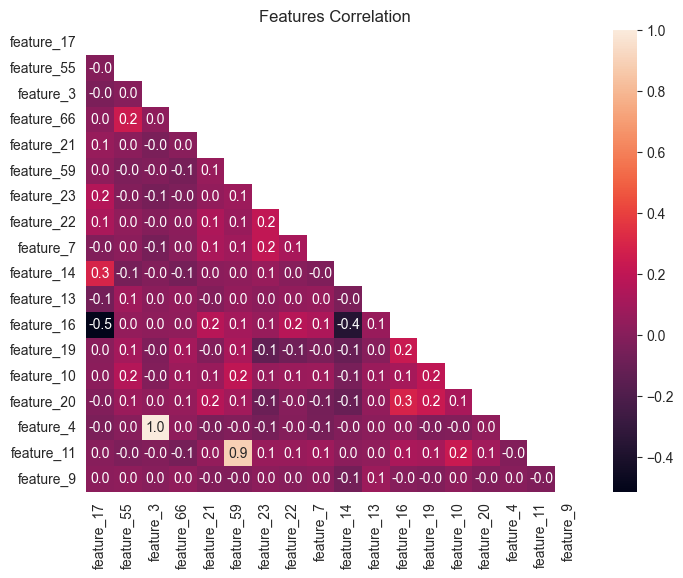

In [16]:
sns.set_style('white')

plt.figure(figsize=(8, 6))
corr = X_train[features].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt=".1f")
plt.title('Features Correlation')

Признаки: `feature_14`, `feature_59`, `feature_3`, `feature_17`.

In [17]:
corr_features = ["feature_14", "feature_59", "feature_3", "feature_17"]
features = list(set(features) - set(corr_features))

## Визуализация признаков
Дополнительно посмотрим на распрделение признаков, возможно получиться заметить что-то интересное.

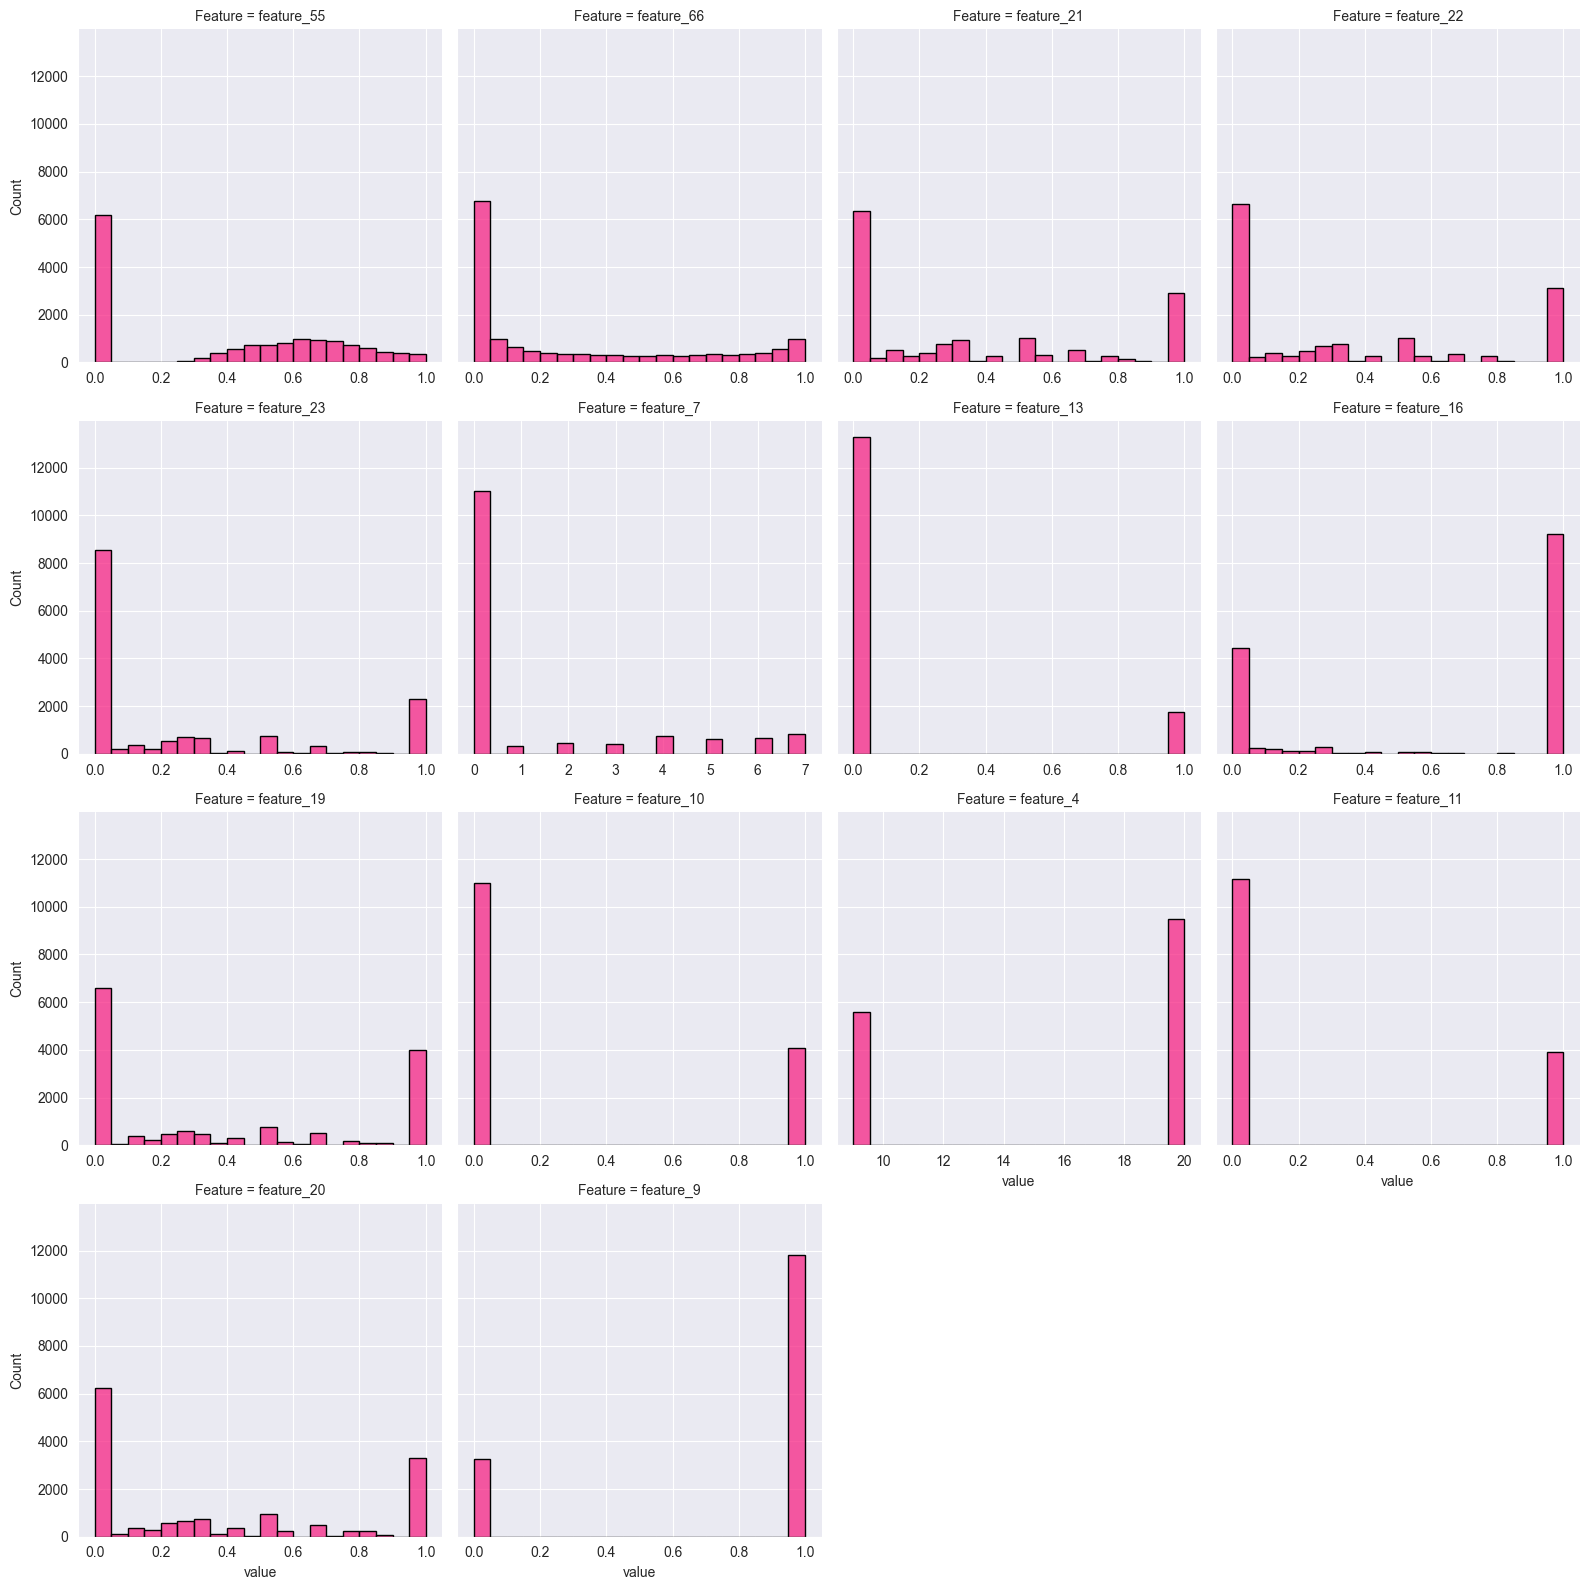

In [18]:
sns.set_style('darkgrid')

reshape_df = X_train[features].melt(var_name='Feature')

grid = sns.FacetGrid(reshape_df, col='Feature', col_wrap=4, height=4, sharex=False)
grid.map(sns.histplot, 'value', bins=20, color='#F72585', edgecolor='black', kde=False)
plt.show()

У многих фичей всего 2 значения, это несколько интересно. Почти ни у одной фичи нет распределения близкого к нормальному, поэтому при нормализации будем использовать min-max подход. **Также не будем работать с выбросами, так как на графиках их не видно**.

## Отсавляем только нужные фичи
На предыдущих шагах мы отобрали ненужные признаки, теперь оставим в данных только нужные.

In [19]:
features = sorted(features, key = lambda x: int(x.split("_")[1]))

In [20]:
X_train = X_train[features]
X_test = X_test[features]

## Стандартизация
Применим MinMaxScaler ко всем признакам. Дополнительно сериализуем его, так как новые данные, которые будут приходить в систему, надо будет стандартизовать таким же образом, а для этого надо запомнить min & max каждого признака.

In [21]:
def get_transformed_df(df: pd.DataFrame, scaler: MinMaxScaler) -> pd.DataFrame:
    scaled_df = scaler.transform(df)
    return pd.DataFrame(scaled_df, columns=df.columns, index=df.index)

In [22]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = get_transformed_df(X_train, scaler)
X_test_scaled = get_transformed_df(X_test, scaler)

In [23]:
scaler_serializer = ScalerSerializator(scaler)
scaler_serializer.serialize("../app/scaler_info.json")

## Target
Посмотрим как распределен наш target.

In [24]:
train_df["target"].value_counts()

target
0    14747
1      322
Name: count, dtype: int64

Видно, что есть существенный дисбаланс классов. Мы хотели бы, чтобы пользователь кликал на как можно большее число объектов, то есть с target = 1, однако таких сильно меньше, чем проигнорированных. Решим проблему с помощью ребалансинга, библиотека `imblearn` в этом поможет.

In [25]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=config.RANDOM_SEED)

In [26]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train_scaled, y_train)

## Сохраняем обработанные результаты

In [27]:
custom_train_df = X_train_resampled.join(y_train_resampled)
custom_test_df = X_test_scaled.join(y_test)

custom_train_df.to_csv("data/custom_train_df.csv", index=False)
custom_test_df.to_csv("data/custom_test_df.csv", index=False)